In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skytrax-airline-reviews/capstone_airline_reviews3.xlsx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('/kaggle/input/skytrax-airline-reviews/capstone_airline_reviews3.xlsx')

In [4]:
data.head(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [5]:
data.tail(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [7]:
data.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [16]:
data = data.drop(['route', 'traveller_type', 'cabin'], axis=1)

In [17]:
data

,airline,overall,author,review_date,customer_review,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data_clean = data.dropna()

In [19]:
data_clean

,airline,overall,author,review_date,customer_review,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131696,Ukraine International,1.0,Nataliya Vasylkevych,6th August 2015,Never flying them again and discourage anyone ...,July 2015,1.0,1.0,1.0,1.0,1.0,1.0,no
131698,Ukraine International,1.0,Sam Naguib,2nd August 2015,Flight from JFK to Kiev was cancelled on July ...,July 2015,1.0,2.0,1.0,1.0,1.0,1.0,no
131702,Ukraine International,10.0,Oleksii Maksimov,20th July 2015,Clean and comfortable cabin. We were offered a...,July 2015,5.0,5.0,5.0,4.0,4.0,4.0,yes
131704,Ukraine International,2.0,Anatoli Chernyaev,18th July 2015,The staff lacked knowledge of the English lang...,July 2015,1.0,1.0,1.0,1.0,1.0,1.0,no


In [20]:
# Remove duplicate rows based on all columns
data_clean_unique = data_clean.drop_duplicates()

print(data_clean_unique)

                      airline  overall                author      review_date  \
1            Turkish Airlines      7.0   Christopher Hackley     8th May 2019   
3            Turkish Airlines      2.0         Adriana Pisoi     7th May 2019   
5            Turkish Airlines      3.0             M Galerko     7th May 2019   
7            Turkish Airlines     10.0           Zeshan Shah     6th May 2019   
9            Turkish Airlines      1.0            Pooja Jain     6th May 2019   
...                       ...      ...                   ...              ...   
131696  Ukraine International      1.0  Nataliya Vasylkevych  6th August 2015   
131698  Ukraine International      1.0            Sam Naguib  2nd August 2015   
131702  Ukraine International     10.0      Oleksii Maksimov   20th July 2015   
131704  Ukraine International      2.0     Anatoli Chernyaev   18th July 2015   
131712  Ukraine International      5.0               S Scott   17th June 2015   

                           

In [24]:
# Convert 'published_date' to datetime format
data_clean_unique['date_flown'] = pd.to_datetime(data_clean_unique['date_flown'])

/tmp/ipykernel_33/1011713840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_unique['date_flown'] = pd.to_datetime(data_clean_unique['date_flown'])


In [25]:
data_clean_unique

,airline,overall,author,review_date,customer_review,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,2019-05-01,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,2019-05-01,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,2019-05-01,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,2019-04-01,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,2019-05-01,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131696,Ukraine International,1.0,Nataliya Vasylkevych,6th August 2015,Never flying them again and discourage anyone ...,2015-07-01,1.0,1.0,1.0,1.0,1.0,1.0,no
131698,Ukraine International,1.0,Sam Naguib,2nd August 2015,Flight from JFK to Kiev was cancelled on July ...,2015-07-01,1.0,2.0,1.0,1.0,1.0,1.0,no
131702,Ukraine International,10.0,Oleksii Maksimov,20th July 2015,Clean and comfortable cabin. We were offered a...,2015-07-01,5.0,5.0,5.0,4.0,4.0,4.0,yes
131704,Ukraine International,2.0,Anatoli Chernyaev,18th July 2015,The staff lacked knowledge of the English lang...,2015-07-01,1.0,1.0,1.0,1.0,1.0,1.0,no


In [26]:
data_clean_unique.shape

(22841, 13)

In [28]:
# check missing values

missing_value = data_clean_unique.isnull().sum()

In [29]:
missing_value

airline            0
overall            0
author             0
review_date        0
customer_review    0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

In [30]:
data_clean_unique.head(10)

,airline,overall,author,review_date,customer_review,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,2019-05-01,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,2019-05-01,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,2019-05-01,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,2019-04-01,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,2019-05-01,1.0,1.0,1.0,1.0,1.0,1.0,no
11,Turkish Airlines,2.0,M Shaw,5th May 2019,âœ… Trip Verified | Istanbul to Budapest via D...,2019-05-01,3.0,3.0,5.0,3.0,1.0,1.0,no
15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,2019-04-01,3.0,3.0,2.0,3.0,1.0,2.0,no
17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,2019-04-01,2.0,3.0,3.0,3.0,3.0,3.0,yes
19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,2019-02-01,1.0,1.0,1.0,1.0,1.0,1.0,no
23,Turkish Airlines,1.0,M Farsalou,25th April 2019,âœ… Trip Verified | Tehran to New York via Ist...,2018-10-01,4.0,4.0,4.0,3.0,1.0,1.0,no


In [31]:
data_clean_unique.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [32]:
data_clean_unique['airline'].value_counts()

airline
American Airlines          1332
United Airlines            1294
British Airways            1259
China Southern Airlines    1152
Emirates                   1058
                           ... 
Thai Smile Airways           12
Tunisair                     10
Adria Airways                 9
Germanwings                   7
QantasLink                    4
Name: count, Length: 81, dtype: int64

In [33]:
data_clean_unique['overall'].value_counts()

overall
1.0     5900
9.0     2949
10.0    2903
8.0     2547
2.0     2241
3.0     1632
7.0     1627
5.0     1053
4.0     1027
6.0      962
Name: count, dtype: int64

In [34]:
data_clean_unique['author'].value_counts()

author
Michel Perrin        48
Anders Pedersen      46
T Eldem              40
John Curtain         39
Neil Jeram           39
                     ..
H Miyagi              1
D Korn                1
M Donnelson           1
Max Huber             1
Anatoli Chernyaev     1
Name: count, Length: 17842, dtype: int64

In [35]:
data_clean_unique['review_date'].value_counts()

review_date
4th January 2016    59
17th June 2015      43
5th January 2016    43
7th January 2016    37
4th October 2015    36
                    ..
30th May 2019        1
23rd May 2019        1
17th May 2019        1
1st January 2015     1
5th June 2019        1
Name: count, Length: 1476, dtype: int64

In [36]:
data_clean_unique['customer_review'].value_counts()

customer_review
Delayed by 10 hrs found out accidentally after check-in when I noticed the boarding pass of the connecting flight showing 19.50 instead of 09.50 (initially thought it was a misprint). No active QF communication as they got my email and mobile number or why on earth did they not delay my flight to Dubai for 10 hours. Later I found out passengers booked under EK flight numbers were reshuffled to other EK connecting flights, passengers under Qantas had to see the QF counter in Dubai (see below). Flight service was extremely poor from FRA to Dubai, took 3 hrs to finish service, whole seat rows were forgotten to service and they could not fix this for 20 minutes (usually they do this instantly). Drinks were not delivered with the meal but well after, EK service has gone dramatically downhill. On arrival in Dubai plane was parked on roll field and we had the longest air field tour ever. It took 20 minutes in a barely air-conditioned bus with 38 degree outside temperature to a

In [37]:
data_clean_unique['date_flown'].value_counts()

date_flown
2015-08-01    699
2015-07-01    651
2016-01-01    644
2015-12-01    640
2015-09-01    621
             ... 
2014-10-01      8
2014-07-01      7
2014-05-01      1
2013-03-01      1
2013-04-01      1
Name: count, Length: 63, dtype: int64

In [38]:
data_clean_unique['seat_comfort'].value_counts()

seat_comfort
1.0    5415
4.0    5342
5.0    4577
3.0    4371
2.0    3136
Name: count, dtype: int64

In [39]:
data_clean_unique['cabin_service'].value_counts()

cabin_service
5.0    7544
1.0    5187
4.0    4065
3.0    3266
2.0    2779
Name: count, dtype: int64

In [43]:
data_clean_unique['food_bev'].value_counts()

food_bev
1.0    6825
5.0    4587
4.0    4404
3.0    3935
2.0    3090
Name: count, dtype: int64

In [44]:
data_clean_unique['entertainment'].value_counts()

entertainment
1.0    6714
4.0    4848
5.0    4437
3.0    4162
2.0    2680
Name: count, dtype: int64

In [40]:
data_clean_unique['ground_service'].value_counts()

ground_service
1.0    7514
5.0    5249
4.0    4679
3.0    3182
2.0    2217
Name: count, dtype: int64

In [41]:
data_clean_unique['value_for_money'].value_counts()

value_for_money
1.0    6681
5.0    5781
4.0    4361
3.0    3122
2.0    2896
Name: count, dtype: int64

In [42]:
data_clean_unique['recommended'].value_counts()

recommended
no     11766
yes    11075
Name: count, dtype: int64

Data Visualization

In [45]:
data_clean_unique.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

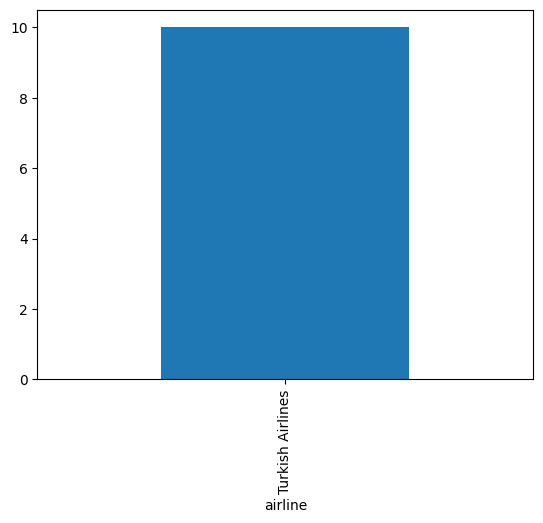

In [55]:
# Barchart

data_clean_unique['airline'].head(10).value_counts().plot(kind='bar')
plt.show()

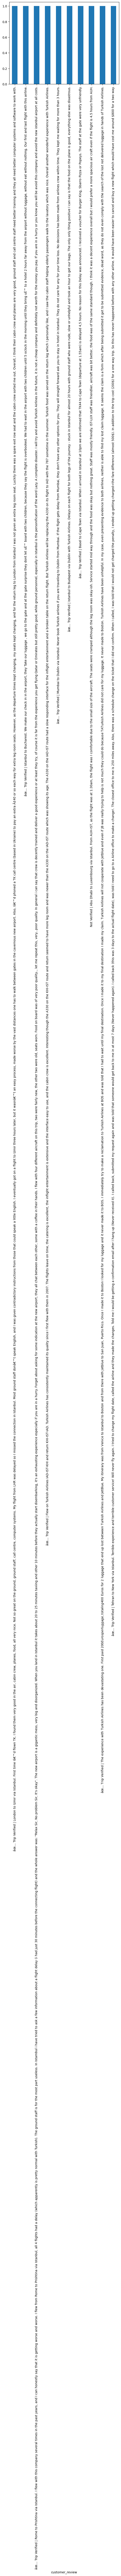

In [56]:
# Barchart

data_clean_unique['customer_review'].head(10).value_counts().plot(kind='bar')
plt.show()

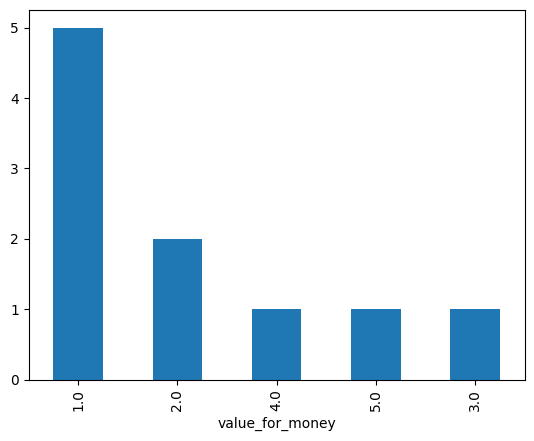

In [57]:
# Barchart

data_clean_unique['value_for_money'].head(10).value_counts().plot(kind='bar')
plt.show()

These services aren't value for money

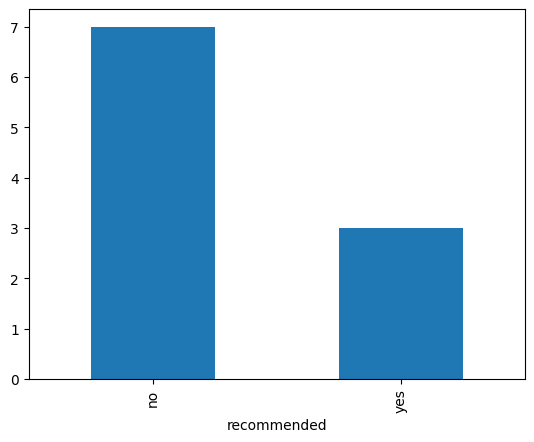

In [58]:
# Barchart

data_clean_unique['recommended'].head(10).value_counts().plot(kind='bar')
plt.show()

Customer not recommended to use these services

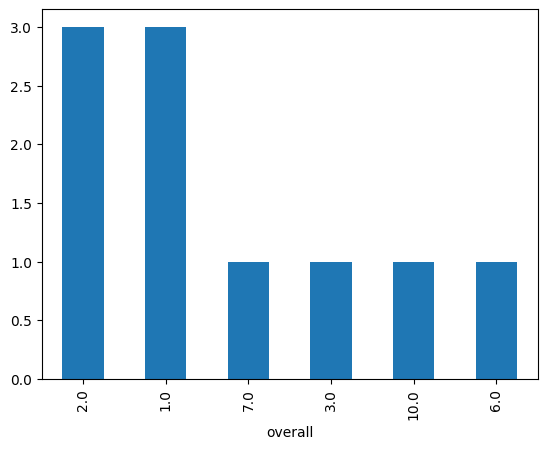

In [59]:
# Barchart

data_clean_unique['overall'].head(10).value_counts().plot(kind='bar')
plt.show()

Overall result showed that customer not statisfied with airplane services

In [51]:
# Assuming data_clean_unique is your original DataFrame
df = data_clean_unique

# Calculating the length of each customer review
df['review_length'] = df['customer_review'].apply(len)

# For simplicity, let's consider "excellent" for positive and "terrible" for negative sentiments within the 'customer_review' column
df['contains_excellent'] = df['customer_review'].str.contains('excellent', case=False).astype(int)
df['contains_terrible'] = df['customer_review'].str.contains('terrible', case=False).astype(int)

# Preparing data for visualization
# We'll aggregate data to see if there's a visible trend between the length of reviews, presence of specific words, and overall ratings
aggregated_data = df.groupby('overall').agg({
    'review_length': 'mean',
    'contains_excellent': 'mean',
    'contains_terrible': 'mean'
}).reset_index()

aggregated_data

/tmp/ipykernel_33/2603345089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_length'] = df['customer_review'].apply(len)
/tmp/ipykernel_33/2603345089.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contains_excellent'] = df['customer_review'].str.contains('excellent', case=False).astype(int)
/tmp/ipykernel_33/2603345089.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,overall,review_length,contains_excellent,contains_terrible
0,1.0,960.302542,0.007797,0.110339
1,2.0,949.946899,0.019188,0.097724
2,3.0,933.944853,0.033701,0.080270
3,4.0,883.845180,0.042843,0.069133
4,5.0,910.584046,0.062678,0.050332
5,6.0,891.729730,0.083160,0.035343
6,7.0,832.996927,0.131530,0.028888
7,8.0,748.346682,0.180605,0.012564
8,9.0,690.195320,0.255680,0.005765
9,10.0,650.213917,0.275921,0.003789


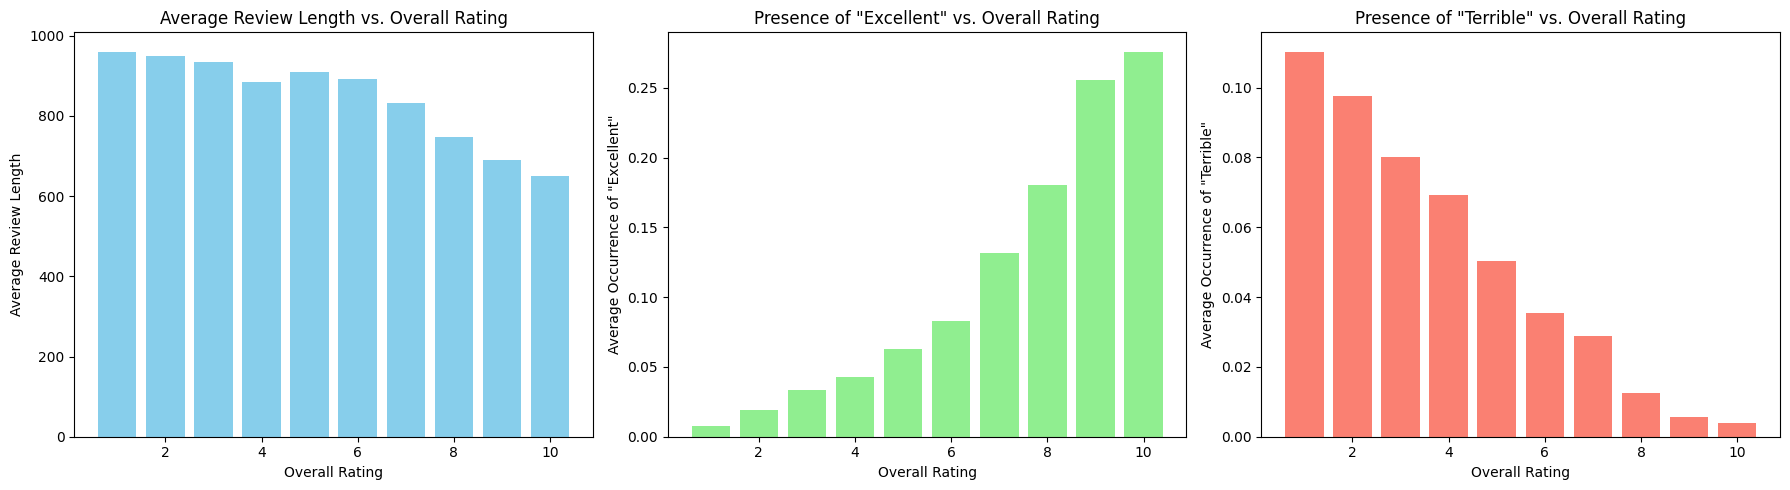

In [52]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Average Review Length vs. Overall Rating
axes[0].bar(aggregated_data['overall'], aggregated_data['review_length'], color='skyblue')
axes[0].set_title('Average Review Length vs. Overall Rating')
axes[0].set_xlabel('Overall Rating')
axes[0].set_ylabel('Average Review Length')

# Presence of "excellent" vs. Overall Rating
axes[1].bar(aggregated_data['overall'], aggregated_data['contains_excellent'], color='lightgreen')
axes[1].set_title('Presence of "Excellent" vs. Overall Rating')
axes[1].set_xlabel('Overall Rating')
axes[1].set_ylabel('Average Occurrence of "Excellent"')

# Presence of "terrible" vs. Overall Rating
axes[2].bar(aggregated_data['overall'], aggregated_data['contains_terrible'], color='salmon')
axes[2].set_title('Presence of "Terrible" vs. Overall Rating')
axes[2].set_xlabel('Overall Rating')
axes[2].set_ylabel('Average Occurrence of "Terrible"')

plt.tight_layout()
plt.show()